##### Kaggle Dataset : https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

# Customer Churn Prediction

## Business Problem
Telecom company is experiencing customer churn.
The goal is to predict which customers are likely to leave.

## Business Impact
- Retaining a customer is cheaper than acquiring a new one.
- Early churn detection can reduce revenue loss.

## Objective
Build a machine learning model to predict churn.

## Evaluation Metric
Since missing a churned customer is costly,
we focus on Recall and F1-score.

# Libraries

In [1]:
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from imblearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Data Understanding

In [2]:
df = pd.read_excel("../Data/Telco_customer_churn.xlsx")

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.shape

(7043, 33)

In [5]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Total Charges'].head(10)

0     108.15
1     151.65
2      820.5
3    3046.05
4     5036.3
5     528.35
6      39.65
7      20.15
8    4749.15
9       30.2
Name: Total Charges, dtype: object

In [11]:
df['Total Charges'].apply(type).value_counts()

Total Charges
<class 'float'>    6708
<class 'int'>       324
<class 'str'>        11
Name: count, dtype: int64

In [12]:
df[df['Total Charges'].apply(type) == str]['Total Charges']

2234     
2438     
2568     
2667     
2856     
4331     
4687     
5104     
5719     
6772     
6840     
Name: Total Charges, dtype: object

In [13]:
df[df['Total Charges'].apply(type) == str]['Total Charges'].unique()

array([' '], dtype=object)

In [14]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [15]:
df['Total Charges'].isnull().sum()

np.int64(11)

In [16]:
df = df[df['Total Charges'].notnull()]

In [17]:
df = df.dropna(subset=['Total Charges'])

In [18]:
df.shape

(7032, 33)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 non-n

# Data Cleaning

In [20]:
for col in df.select_dtypes(include='object'):
    print("----", col, "----")
    print(df[col].unique())
    print()

---- CustomerID ----
['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']

---- Country ----
['United States']

---- State ----
['California']

---- City ----
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']

---- Lat Long ----
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401'
 '40.363446, -123.835041']

---- Gender ----
['Male' 'Female']

---- Senior Citizen ----
['No' 'Yes']

---- Partner ----
['No' 'Yes']

---- Dependents ----
['No' 'Yes']

---- Phone Service ----
['Yes' 'No']

---- Multiple Lines ----
['No' 'Yes' 'No phone service']

---- Internet Service ----
['DSL' 'Fiber optic' 'No']

---- Online Security ----
['Yes' 'No' 'No internet service']

---- Online Backup ----
['Yes' 'No' 'No internet service']

---- Device Protection ----
['No' 'Yes' 'No internet service']

---- Tech Support ----
['No' 'Yes' 'No internet service']


In [21]:
cols_to_drop = [
    'CustomerID','Count','Country','State','City',
    'Zip Code','Lat Long','Latitude','Longitude',
    'Churn Score','CLTV','Churn Reason'
]

df = df.drop(columns=cols_to_drop)  

In [22]:
df.shape

(7032, 21)

In [23]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1


In [24]:
df.isnull().sum().sum()

np.int64(0)

# Exploratory Data Analysis (EDA)

In [25]:
df[['Tenure Months','Monthly Charges','Total Charges']].describe()

,Tenure Months,Monthly Charges,Total Charges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [26]:
df['Churn Value'].value_counts(normalize=True)*100

Churn Value
0    73.421502
1    26.578498
Name: proportion, dtype: float64

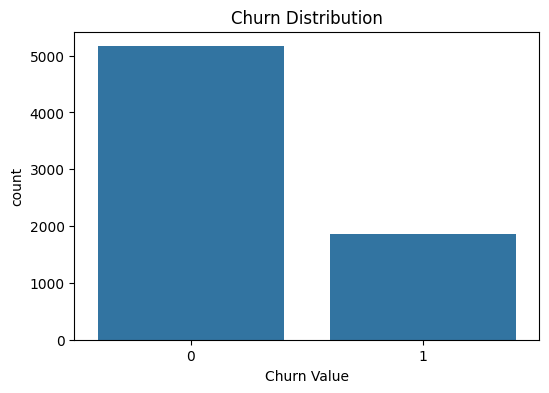

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn Value')
plt.title("Churn Distribution")
plt.show()

In [28]:
pd.crosstab(df['Contract'], df['Churn Value'], normalize='index')*100

Churn Value,0,1
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


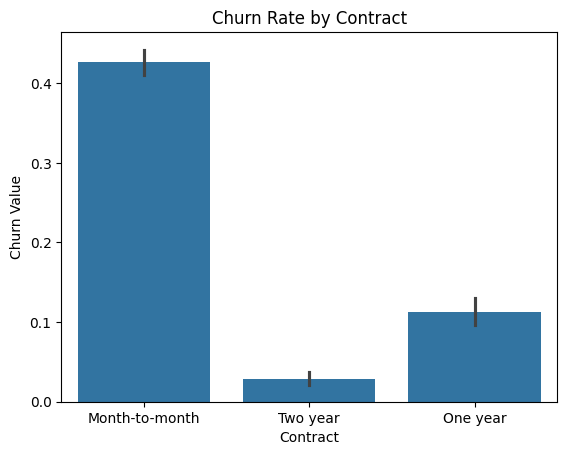

In [29]:
sns.barplot(
    data=df,
    x='Contract',
    y='Churn Value',
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Churn Rate by Contract")
plt.show()

In [30]:
categorical_cols = [
    'Contract',
    'Internet Service',
    'Payment Method',
    'Senior Citizen',
    'Paperless Billing',
    'Tech Support',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Streaming TV',
    'Streaming Movies',
    'Partner',
    'Dependents'
]

In [31]:
for col in categorical_cols:
    print("======", col, "======")
    print(pd.crosstab(df[col], df['Churn Value'], normalize='index')*100)
    print("\n")

====== Contract ======
Churn Value             0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


====== Internet Service ======
Churn Value               0          1
Internet Service                      
DSL               81.001656  18.998344
Fiber optic       58.107235  41.892765
No                92.565789   7.434211


====== Payment Method ======
Churn Value                        0          1
Payment Method                                 
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


====== Senior Citizen ======
Churn Value             0          1
Senior Citizen                      
No              76.349745  23.650255
Yes             58.318739  41.681261


====== Paperless Billing ======
Churn Value                0    

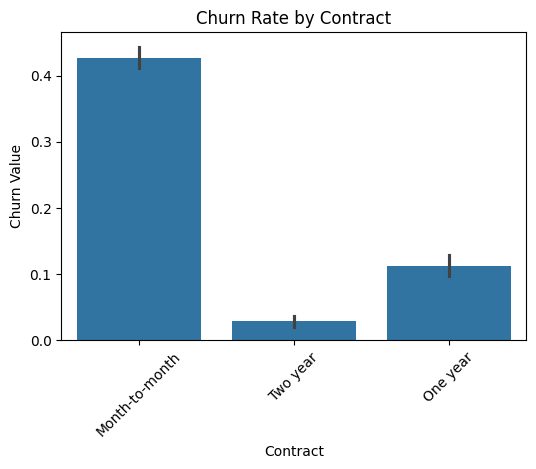

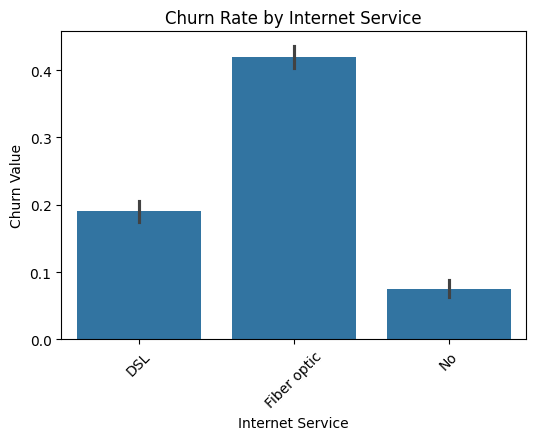

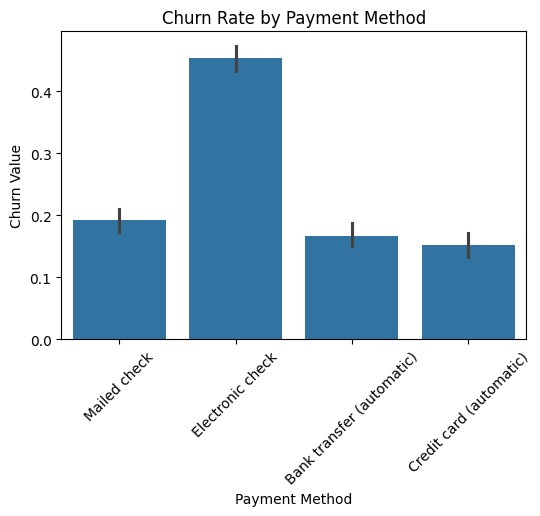

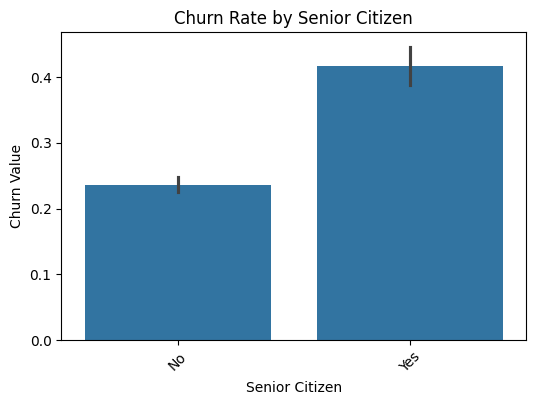

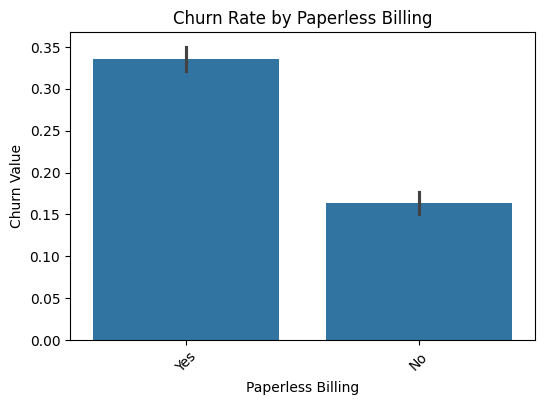

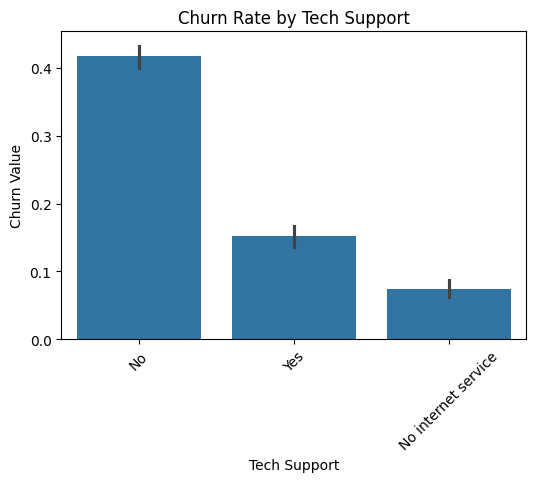

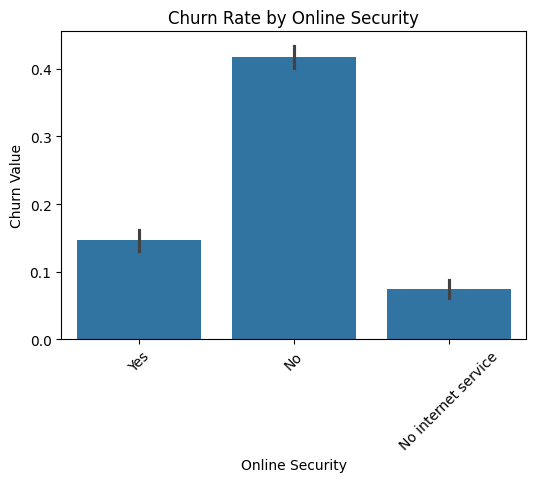

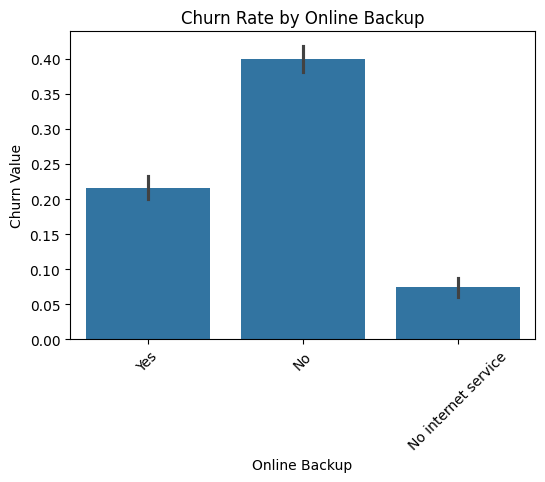

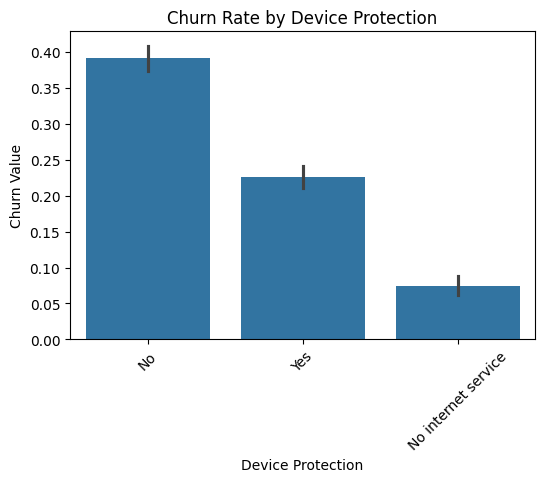

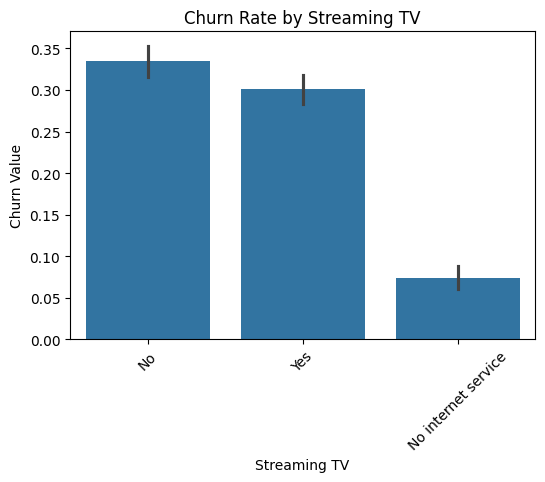

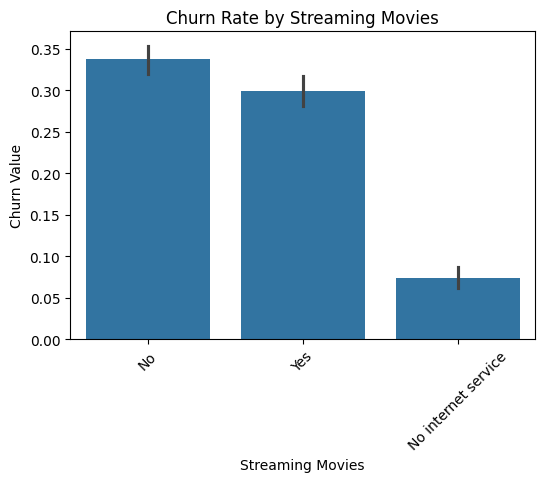

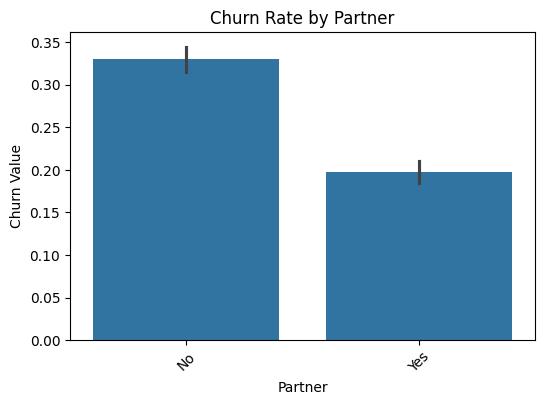

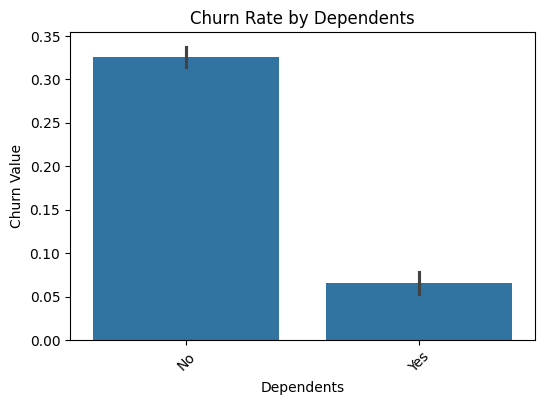

In [32]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    
    sns.barplot(
        data=df,
        x=col,
        y='Churn Value',
        estimator=np.mean
    )
    
    plt.title(f"Churn Rate by {col}")
    plt.xticks(rotation=45)
    plt.show()

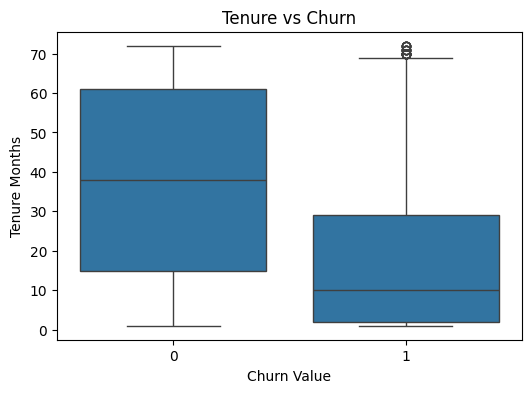

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn Value', y='Tenure Months')
plt.title("Tenure vs Churn")
plt.show()

In [34]:
df.groupby('Churn Value')['Tenure Months'].median()

Churn Value
0    38.0
1    10.0
Name: Tenure Months, dtype: float64

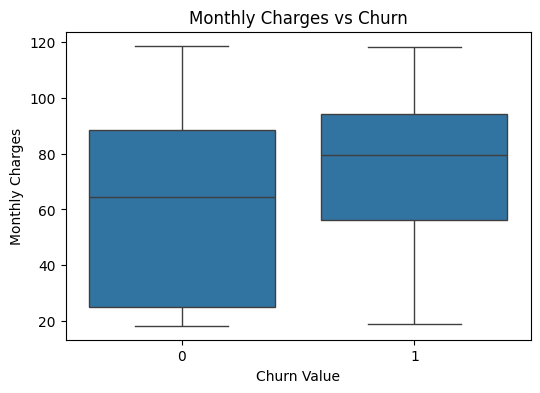

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn Value', y='Monthly Charges')
plt.title("Monthly Charges vs Churn")
plt.show()

In [36]:
df.groupby('Churn Value')['Monthly Charges'].median()

Churn Value
0    64.45
1    79.65
Name: Monthly Charges, dtype: float64

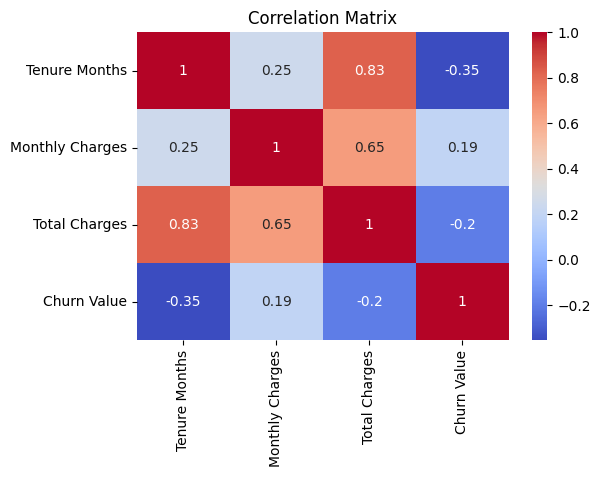

In [37]:
plt.figure(figsize=(6,4))

sns.heatmap(
    df[['Tenure Months','Monthly Charges','Total Charges','Churn Value']].corr(),
    annot=True,
    cmap='coolwarm'
)

plt.title("Correlation Matrix")
plt.show()

# Feature Engineering

In [38]:
df['Tenure Group'] = pd.cut(
    df['Tenure Months'],
    bins=[0,12,24,48,72],
    labels=['0-12','12-24','24-48','48-72']
)

In [39]:
pd.crosstab(df['Tenure Group'], df['Churn Value'], normalize='index')*100

Churn Value,0,1
Tenure Group,,
0-12,52.321839,47.678161
12-24,71.289062,28.710938
24-48,79.611041,20.388959
48-72,90.486824,9.513176


In [40]:
df['High Charges'] = (df['Monthly Charges'] > df['Monthly Charges'].median()).astype(int)

In [41]:
df['High Risk Customer'] = (
    (df['Contract'] == 'Month-to-month') &
    (df['Internet Service'] == 'Fiber optic') &
    (df['Tech Support'] == 'No')
).astype(int)

In [42]:
services = [
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies'
]

df['Services Count'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)

In [43]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Tenure Group,High Charges,High Risk Customer,Services Count
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0-12,0,0,2
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,1,0-12,1,1,0
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Electronic check,99.65,820.50,Yes,1,0-12,1,1,3
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Electronic check,104.80,3046.05,Yes,1,24-48,1,0,4
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,48-72,1,1,4


In [44]:
df[['High Risk Customer','Services Count']].head()

,High Risk Customer,Services Count
0,0,2
1,1,0
2,1,3
3,0,4
4,1,4


In [45]:
pd.crosstab(df['High Risk Customer'], df['Churn Value'], normalize='index')*100

Churn Value,0,1
High Risk Customer,,
0,84.033613,15.966387
1,42.483296,57.516704


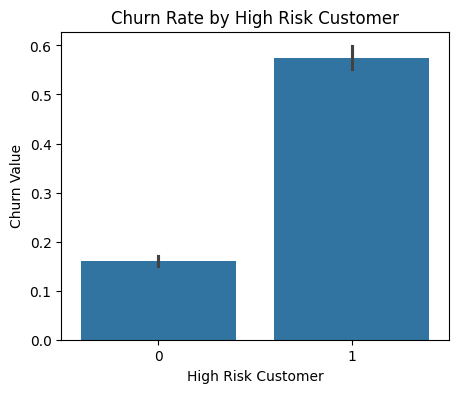

In [46]:
plt.figure(figsize=(5,4))
sns.barplot(
    data=df,
    x='High Risk Customer',
    y='Churn Value',
    estimator=np.mean
)
plt.title("Churn Rate by High Risk Customer")
plt.show()

In [47]:
pd.crosstab(df['Services Count'], df['Churn Value'], normalize='index')*100

Churn Value,0,1
Services Count,,
0,78.535924,21.464076
1,54.244306,45.755694
2,64.181994,35.818006
3,72.605192,27.394808
4,77.647059,22.352941
5,87.521968,12.478032
6,94.718310,5.281690


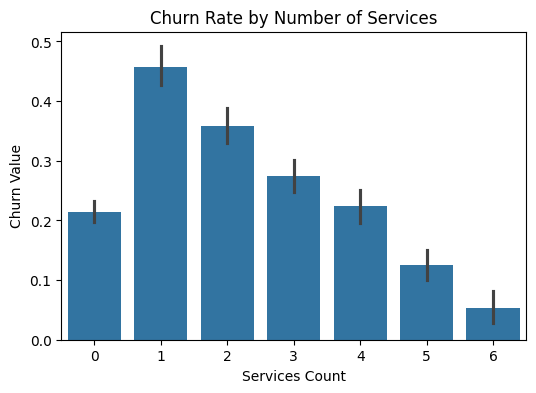

In [48]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='Services Count',
    y='Churn Value',
    estimator=np.mean
)
plt.title("Churn Rate by Number of Services")
plt.show()

In [49]:
df['CLV_Ratio'] = df['Total Charges'] / (df['Monthly Charges'] + 1)

In [50]:
contract_map = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}

df['Contract_Length'] = df['Contract'].map(contract_map)

In [51]:
df['Fiber_No_Support'] = (
    (df['Internet Service'] == 'Fiber optic') &
    (df['Tech Support'] == 'No')
).astype(int)

In [52]:
df['Low_Service_Loyal'] = (
    (df['Tenure Months'] > 24) &
    (df['Services Count'] <= 2)
).astype(int)

In [53]:
df['Charge_Per_Service'] = df['Monthly Charges'] / (df['Services Count'] + 1)

# Train/Test Split

In [54]:
X = df.drop(columns=['Churn Label', 'Churn Value'])
y = df['Churn Value']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [56]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))

Train shape: (5625, 28)
Test shape: (1407, 28)

Train target distribution:
Churn Value
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Test target distribution:
Churn Value
0    0.734186
1    0.265814
Name: proportion, dtype: float64


In [57]:
num_cols = [
    'Tenure Months',
    'Monthly Charges',
    'Total Charges',
    'Services Count'
]

In [58]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'High Charges',
 'High Risk Customer',
 'Services Count',
 'CLV_Ratio',
 'Contract_Length',
 'Fiber_No_Support',
 'Low_Service_Loyal',
 'Charge_Per_Service']

In [59]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()
cat_cols

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [60]:
num_transformer = StandardScaler()

In [61]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

In [63]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [64]:
feature_names = preprocessor.get_feature_names_out()

In [65]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(
    X_train_processed,
    y_train
)

In [66]:
print(y_train_res.value_counts())

Churn Value
0    4130
1    4130
Name: count, dtype: int64


# Models

In [67]:
model = LogisticRegression(max_iter=1000)

In [68]:
model.fit(X_train_res, y_train_res)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [69]:
y_pred = model.predict(X_test_processed)

print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[749 284]
 [ 86 288]]


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.50      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



In [70]:
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    random_state=42
)

rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test_processed)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.57      0.59      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.77      0.78      1407



In [71]:
gb = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_res, y_train_res)

y_pred_gb = gb.predict(X_test_processed)

print("Gradient Boosting Results:\n")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Results:

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.58      0.64      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407



In [72]:
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test_processed)

print("XGBoost Results:\n")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.58      0.61      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [73]:
lgb = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

lgb.fit(X_train_res, y_train_res)

X_test_df = pd.DataFrame(
    X_test_processed,
    columns=feature_names
)

y_pred_lgb = lgb.predict(X_test_df)

print("LightGBM Results:\n")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6018
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Results:

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [74]:
cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_state=42
)

cat.fit(X_train_res, y_train_res)

y_pred_cat = cat.predict(X_test_processed)

print("CatBoost Results:\n")
print(classification_report(y_test, y_pred_cat))


CatBoost Results:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.58      0.61      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [75]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos
scale_pos_weight


np.float64(2.762541806020067)

In [76]:
xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='average_precision',   
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.8, 1], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'average_precision'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fol

In [77]:
best_xgb = grid.best_estimator_

y_pred = best_xgb.predict(X_test_processed)

print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred))

Best Params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.77      1407



# Final Model

In [78]:
xgb = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb)
])


In [79]:
param_grid = {
    'classifier__n_estimators': [300, 500],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__colsample_bytree': [0.8, 1], 'classifier__learning_rate': [0.01, 0.05], 'classifier__max_depth': [3, 5, ...], 'classifier__n_estimators': [300, 500], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >

In [80]:
print("Best Params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

Best Params: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best ROC-AUC: 0.8602557354215424


In [81]:
best_model = grid.best_estimator_

y_proba = best_model.predict_proba(X_test)[:,1]

In [82]:
roc = roc_auc_score(y_test, y_proba)
print("Test ROC-AUC:", roc)

Test ROC-AUC: 0.8428956727459092


In [83]:
threshold = 0.35   # نجرب أقل من 0.5
y_pred_custom = (y_proba >= threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407



In [84]:
joblib.dump(best_model, "../Model/churn_model.pkl")

['../Model/churn_model.pkl']

In [85]:
production_model = Pipeline(steps=[
    ('preprocessor', best_model.named_steps['preprocessor']),
    ('classifier', best_model.named_steps['classifier'])
])

In [86]:
y_proba = production_model.predict_proba(X_test)[:, 1]

print("Final Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Final Test ROC-AUC: 0.8428956727459092
Confusion Matrix:
[[781 252]
 [ 94 280]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.75      0.77      1407



In [87]:
joblib.dump(production_model, "../Model/churn_model_production.pkl")

['../Model/churn_model_production.pkl']